In [1]:
#pip install datasets
#pip install numpy
#pip install pandas
#pip install seaborn
#pip install scikit-learn
#pip install openpyxl
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from datasets import load_dataset

In [2]:
df = pd.read_csv('Twitter_Data.csv')
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negativo
1,talk all the nonsense and continue all the dra...,Neutro
2,what did just say vote for modi welcome bjp t...,Positivo
3,asking his supporters prefix chowkidar their n...,Positivo
4,answer who among these the most powerful world...,Positivo
...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo
162964,dear rss terrorist payal gawar what about modi...,Negativo
162965,did you cover her interaction forum where she ...,Neutro
162966,there big project came into india modi dream p...,Neutro


<Axes: >

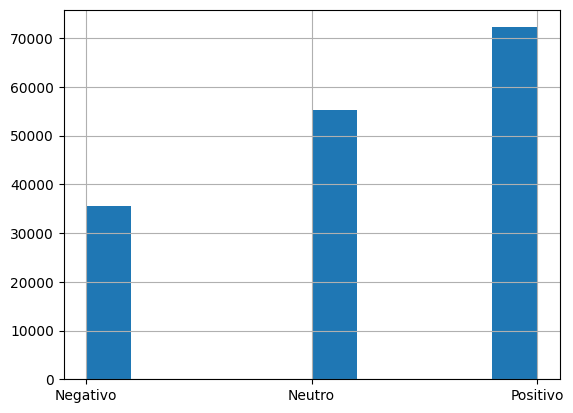

In [3]:
df['category'].hist()

In [4]:
#etiqueta y enumeracion
target_map = {'Positivo': 1, 'Negativo': 0, 'Neutro': 2}
df['target'] = df['category'].map(target_map)

In [5]:
df

,clean_text,category,target
0,when modi promised “minimum government maximum...,Negativo,0
1,talk all the nonsense and continue all the dra...,Neutro,2
2,what did just say vote for modi welcome bjp t...,Positivo,1
3,asking his supporters prefix chowkidar their n...,Positivo,1
4,answer who among these the most powerful world...,Positivo,1
...,...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo,0
162964,dear rss terrorist payal gawar what about modi...,Negativo,0
162965,did you cover her interaction forum where she ...,Neutro,2
162966,there big project came into india modi dream p...,Neutro,2


In [6]:
#divicion de datos para test y train
df_train, df_test = train_test_split(df)

In [7]:
df_train.head()

,clean_text,category,target
107185,congress will hardly get seats because their p...,Negativo,0
110007,there will vote favour modieven pole will win ...,Positivo,1
36152,you need attend college understand saying and ...,Positivo,1
27052,lol whoever their candidate heo she will not f...,Positivo,1
102399,must put its foot down and not permit release ...,Negativo,0


In [8]:
df_train

,clean_text,category,target
107185,congress will hardly get seats because their p...,Negativo,0
110007,there will vote favour modieven pole will win ...,Positivo,1
36152,you need attend college understand saying and ...,Positivo,1
27052,lol whoever their candidate heo she will not f...,Positivo,1
102399,must put its foot down and not permit release ...,Negativo,0
...,...,...,...
120915,people are voting for modi not for bjp\n,Neutro,2
101533,pakistan and terrorist dont want modi india yo...,Negativo,0
1047,please dont forget remove fakendra modis corru...,Negativo,0
45749,latest news india election 2019 modi says indi...,Positivo,1


In [9]:
#vetorizasr datos
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['clean_text'])
X_train

<122226x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1763603 stored elements in Compressed Sparse Row format>

In [10]:
X_test = vectorizer.transform(df_test['clean_text'])
X_test

<40742x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 588985 stored elements in Compressed Sparse Row format>

In [11]:
#definir targets
Y_train = df_train['target']
Y_test = df_test['target']

In [12]:
#entranar modelo con regresion logistica
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8964050202084662
Test acc: 0.892322419125227


In [13]:
#predecir modelo
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [14]:
#matriz de confucion
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.75718104, 0.12220005, 0.12061891],
       [0.03682699, 0.90240848, 0.06076453],
       [0.00831822, 0.01373474, 0.97794704]])

In [15]:
#plot
def plot_cm(cm):
    classes = ['negativo', 'positivo', 'neutro']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

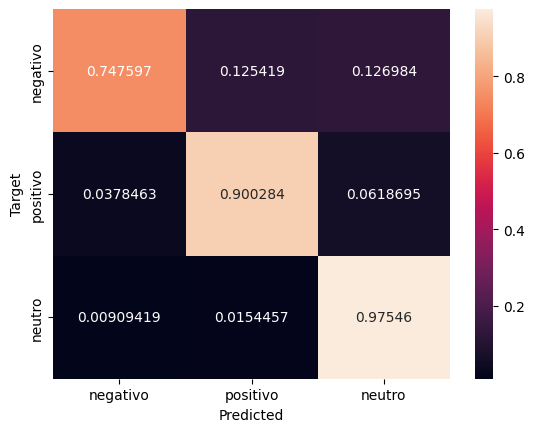

In [16]:
#impirmir matrzi de confucion
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)